In [78]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
import zipfile
from scipy.io import loadmat
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set()
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [79]:
from scipy.io import loadmat
import glob
import random
import matplotlib.image as img
#Install pillow
from PIL import Image

d_name = '../doc/rawdata'
sample = 0.2
X = []
for nfile in  os.listdir(d_name):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X.append(np.array(img).flatten())

X = np.array(X)

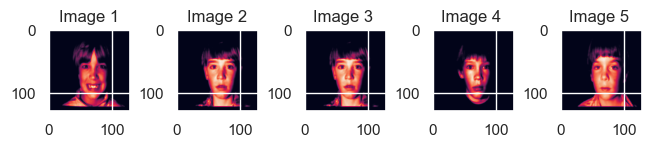

In [80]:
def plot_1_images(data, label="Image 1", ax=None):
    fn_shape = lambda X: X.reshape(128,128)
    fig = None
    if ax is None:
        fig, ax = plt.subplots(1,1, constrained_layout=True)
    ax.imshow(fn_shape(data))
    ax.set_title(label=label)
    return fig,ax

def plot_3_images(data,ix_1, ix_2 , ix_3,ix_4,ix_5):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,5, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    ax[3].imshow(fn_shape(data[ix_4]))
    ax[3].set_title(label="Image %s "% ix_4)
    ax[4].imshow(fn_shape(data[ix_5]))
    ax[4].set_title(label="Image %s "% ix_5)
    plt.show()
    
def plot_x_images(data,ix_1, ix_2 , ix_3):
    fn_shape = lambda X: X.reshape(128,128)
    fig, ax = plt.subplots(1,3, constrained_layout=True)
    ax[0].imshow(fn_shape(data[ix_1]))
    ax[0].set_title(label="Image %s"% ix_1)
    ax[1].imshow(fn_shape(data[ix_2]))
    ax[1].set_title(label="Image %s"% ix_2)
    ax[2].imshow(fn_shape(data[ix_2]))
    ax[2].set_title(label="Image %s "% ix_3)
    plt.show()
plot_3_images(X,1, 2 , 3,4,5)

In [81]:
means =[]
for i in  X:
    mean2 = np.mean(i)
    means.append(mean2)
    print(mean2)

28.40032958984375
29.68829345703125
30.03277587890625
36.87548828125
14.90118408203125
38.3719482421875
26.32171630859375
30.4239501953125
26.56585693359375
36.19097900390625
35.20465087890625
46.523193359375
43.14947509765625
33.03790283203125
31.46270751953125
22.77813720703125
30.9986572265625
28.90234375
36.3245849609375
31.92364501953125
41.8072509765625
30.13330078125
39.3819580078125
20.94036865234375
29.380859375
21.6202392578125
23.1075439453125
40.873779296875
36.5723876953125
29.3101806640625
20.57781982421875
36.49847412109375
38.56060791015625
30.68280029296875
27.82830810546875
29.28369140625
24.30462646484375
36.80517578125
30.849853515625
56.904052734375
30.85443115234375
34.66754150390625
31.85760498046875
20.68548583984375
36.10595703125
32.1961669921875
30.5670166015625
39.330322265625
33.6785888671875
39.2266845703125
24.6134033203125
25.61328125
23.73779296875
28.42315673828125
28.07183837890625
39.8304443359375
40.607666015625
46.19439697265625
41.7899169921875
34

In [82]:
print(len(means))
print(means)

835
[28.40032958984375, 29.68829345703125, 30.03277587890625, 36.87548828125, 14.90118408203125, 38.3719482421875, 26.32171630859375, 30.4239501953125, 26.56585693359375, 36.19097900390625, 35.20465087890625, 46.523193359375, 43.14947509765625, 33.03790283203125, 31.46270751953125, 22.77813720703125, 30.9986572265625, 28.90234375, 36.3245849609375, 31.92364501953125, 41.8072509765625, 30.13330078125, 39.3819580078125, 20.94036865234375, 29.380859375, 21.6202392578125, 23.1075439453125, 40.873779296875, 36.5723876953125, 29.3101806640625, 20.57781982421875, 36.49847412109375, 38.56060791015625, 30.68280029296875, 27.82830810546875, 29.28369140625, 24.30462646484375, 36.80517578125, 30.849853515625, 56.904052734375, 30.85443115234375, 34.66754150390625, 31.85760498046875, 20.68548583984375, 36.10595703125, 32.1961669921875, 30.5670166015625, 39.330322265625, 33.6785888671875, 39.2266845703125, 24.6134033203125, 25.61328125, 23.73779296875, 28.42315673828125, 28.07183837890625, 39.8304443

Mean Face

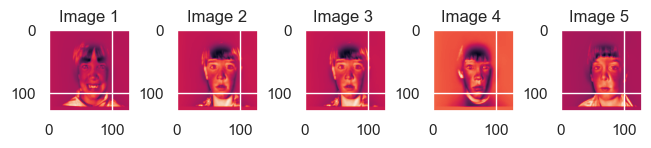

In [83]:
X_mean = X.mean(axis=0)
X_center = X - X_mean
plot_3_images(X_center,1, 2 ,3,4,5)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

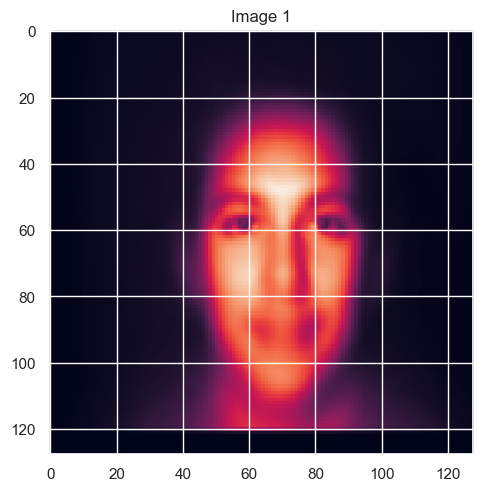

In [84]:
plot_1_images(X_mean)

matriz de covarianza

In [85]:
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
# images x dim
X_reduced = pca.fit_transform(X_center)

In [86]:
eigen_values = pca.explained_variance_
eigen_faces = pca.components_

In [87]:
eigen_values

array([6.86606055e+06, 2.17239304e+06, 1.91492780e+06, 1.06418696e+06,
       8.82624209e+05, 8.34844334e+05, 6.13914152e+05, 4.37294475e+05,
       3.64425151e+05, 3.45545999e+05, 2.69005097e+05, 2.28721166e+05,
       2.16003162e+05, 1.81355779e+05, 1.72256615e+05, 1.67596374e+05,
       1.56992854e+05, 1.54716075e+05, 1.40704060e+05, 1.27511051e+05,
       1.18261203e+05, 1.16746945e+05, 1.15002866e+05, 1.10595781e+05,
       1.07015423e+05, 1.01143319e+05, 9.63882745e+04, 9.16449014e+04,
       8.34969312e+04, 7.87665877e+04, 7.65480731e+04, 7.41467088e+04,
       7.29568747e+04, 6.85199964e+04, 6.38251396e+04, 6.20038375e+04,
       6.16188613e+04, 5.81832468e+04, 5.71810838e+04, 5.49494831e+04,
       5.20583182e+04, 5.02106730e+04, 4.98833461e+04, 4.82837361e+04,
       4.80761218e+04, 4.54246097e+04, 4.39765688e+04, 4.19735203e+04,
       4.18582184e+04, 4.07931098e+04, 3.97197456e+04, 3.83083059e+04,
       3.69949265e+04, 3.58491767e+04, 3.45734865e+04, 3.39596787e+04,
      

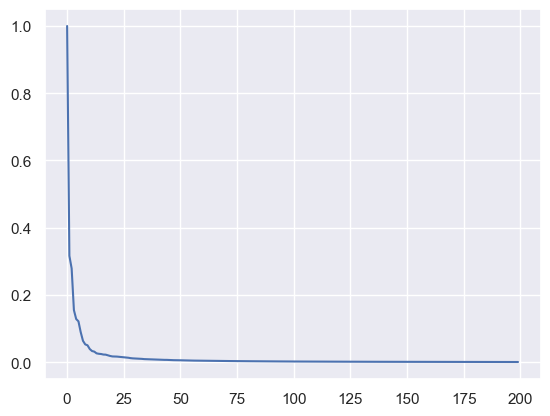

In [88]:
# Se puede ver como los primeras componentes contienen mas informacion
plt.plot(range(0,200), eigen_values/eigen_values[0])

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

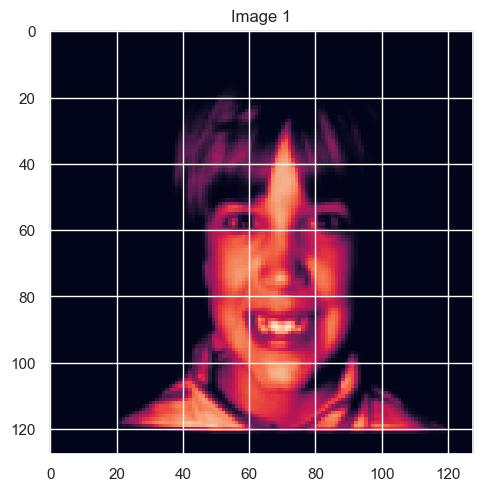

In [89]:
plot_1_images(X[1])

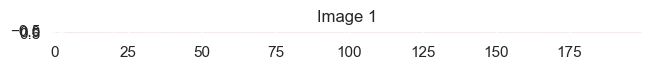

In [90]:
fig, ax = plt.subplots(1,1, constrained_layout=True)
ax.imshow(X_reduced[1].reshape(1,-1))
ax.set_title(label="Image 1")
plt.show()

Reconstruir la imagen

In [91]:
print('Componentes', X_reduced.shape)
print('Eigenvectores', eigen_faces.shape)
face_1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
print(face_1.sum(axis=0))

Componentes (835, 200)
Eigenvectores (200, 16384)
[ 2.01826115e-11 -1.48397455e-11 -3.95496821e-02 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]


In [92]:
eigen_faces[0].shape
face_c1 = np.dot(X_reduced[1].reshape(1,-1),eigen_faces)
face_c1.shape

(1, 16384)

(<Figure size 640x480 with 1 Axes>, <Axes: title={'center': 'Image 1'}>)

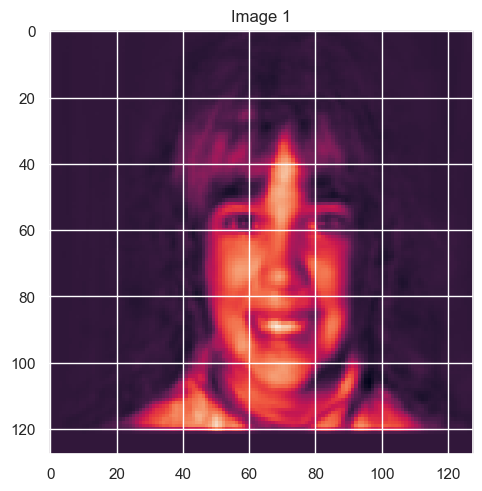

In [93]:
plot_1_images(X_mean + face_1.sum(axis=0) )

In [94]:
def variancePorcentaje(porcentage, values):
    actual =0
    suma=0
    for a in range(len(values)):
        suma = suma + values[a]
    for i in range(len(values)):
        actual =  actual +  values[i]/suma
        if actual>= porcentage:
            return i
print(f"el 90% de la vairianza se explica en los primeros {variancePorcentaje(0.9, eigen_values)} eigen_values")
print(f"el 99% de la varianza se explica en los primeros {variancePorcentaje(0.99, eigen_values)} eigen_values")

el 90% de la vairianza se explica en los primeros 47 eigen_values
el 99% de la varianza se explica en los primeros 162 eigen_values


(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

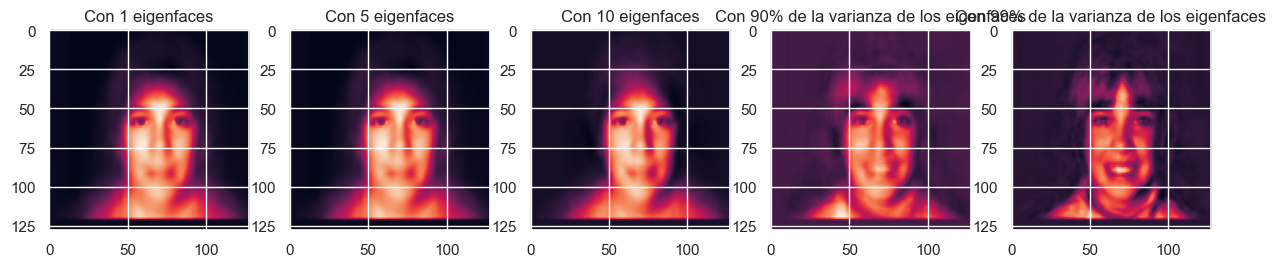

In [95]:
face_1 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[1].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

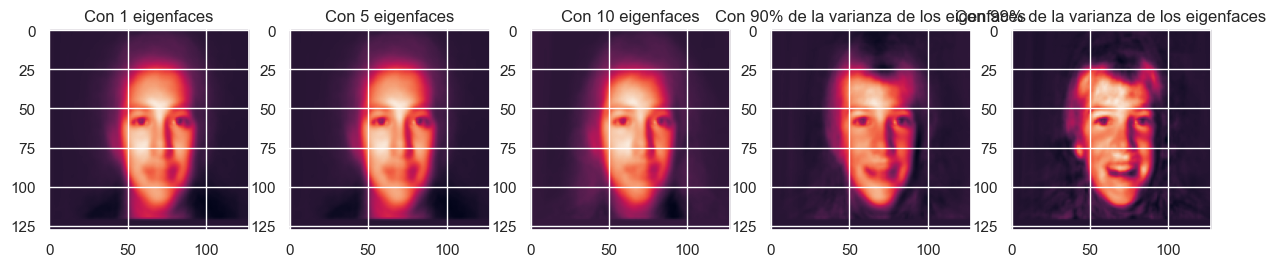

In [96]:
face_1 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[0].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

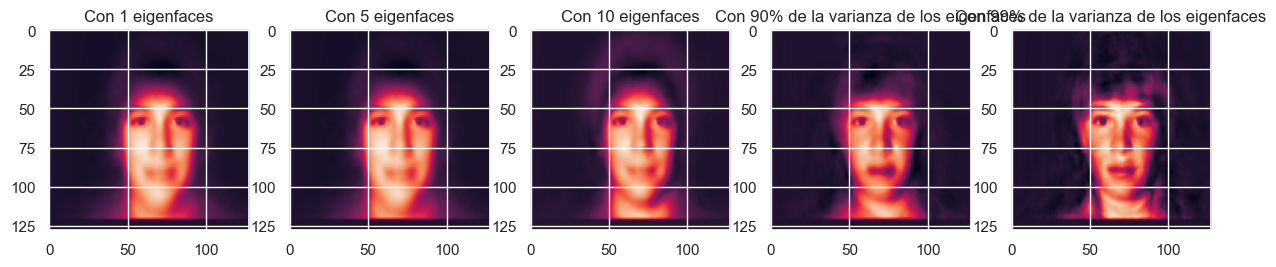

In [97]:
face_1 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[2].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

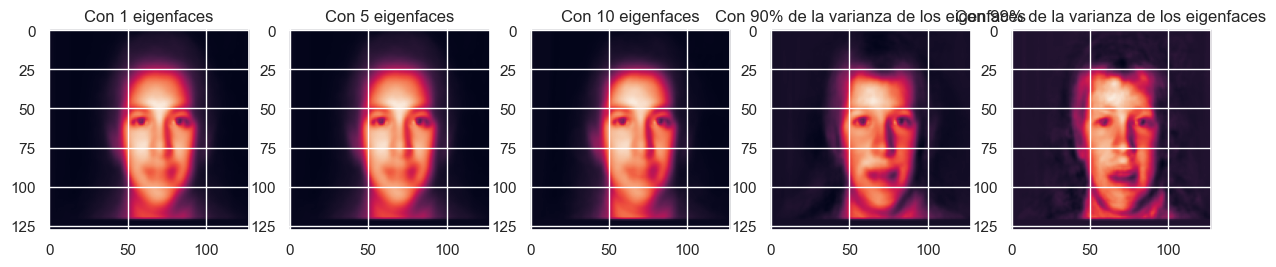

In [98]:
face_1 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[3].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

(None, <Axes: title={'center': 'Con 99% de la varianza de los eigenfaces'}>)

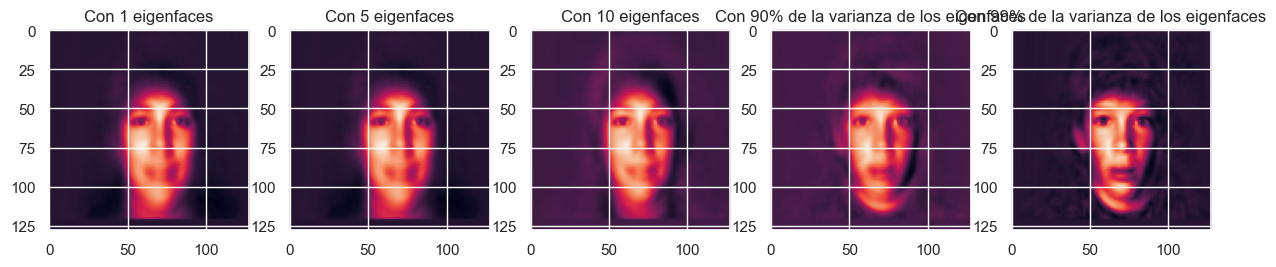

In [99]:
face_1 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_5 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:5],
                                 eigen_faces[:5,:]),
                            axis=0)
face_10 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:10],
                                      eigen_faces[:10,:]),
                               axis=0)


face_180 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:49],
                                      eigen_faces[:49,:]),
                               axis=0)

face_198 = X_mean + np.sum(np.dot(X_reduced[4].reshape(1,-1)[:,:163],
                                     eigen_faces[:163,:]),
                              axis=0)
fig, ax = plt.subplots(1,5,figsize=(15,15))
plot_1_images(face_1,ax=ax[0],label="Con 1 eigenfaces")
plot_1_images(face_5,ax=ax[1],label="Con 5 eigenfaces")
plot_1_images(face_10,ax=ax[2],label="Con 10 eigenfaces")
plot_1_images(face_180,ax=ax[3],label="Con 90% de la varianza de los eigenfaces")
plot_1_images(face_198,ax=ax[4],label="Con 99% de la varianza de los eigenfaces")

## Punto 2 kmeans

In [100]:
class Kmeans:
    
    def __init__(self, k):
        self.k = k
        self.mu = None
        self.his_mu = []
        
    def calculate_labels(self,X):
        # Using Distance formula -2X*MU  + X^2 + MU^2
        dis = -2 * np.dot(X, self.mu.T) 
        dis = dis + np.power(X, 2).sum(axis=1).reshape((-1, 1))
        dis = dis + np.power(self.mu,2).sum(axis=1)
        n_l = dis.argsort(axis=1)[:,0].reshape((-1,1))
        return n_l
    
    def train(self, X, verbose=False):
        X = np.array(X)
        l = np.random.randint(0,high=self.k,size=(X.shape[0],1))
        n_l = None
        while n_l is None or not np.array_equal(l,n_l):
            cur_mu = []
            if n_l is not None:
                l = n_l
            X_l = np.hstack((X,l))
            for i in range(self.k):
                cur_mu.append( 
                    np.mean(
                        X_l[np.where(X_l[:,-1]==i),:-1],
                        axis=1
                    )
                )
            self.mu = np.vstack(cur_mu) 
            self.his_mu.append(self.mu)
            n_l = self.calculate_labels(X)
            if verbose: print(self.mu)
                
    def predict(self,X):
        n_l = self.calculate_labels(X)
        return n_l

Explained variation per principal component: 0.49378854156197693
[[ -274.29206207   -89.05812694 -1059.76763224]
 [ -761.51239858  -433.31685308  1982.71107533]
 [ -337.71222418 -1265.65835614  2070.53387493]
 ...
 [-3681.07953185   -82.93638724   502.8619505 ]
 [ -845.2244413  -1075.53197379  1704.33304219]
 [ -948.50983644  -212.24676804   139.08920863]]


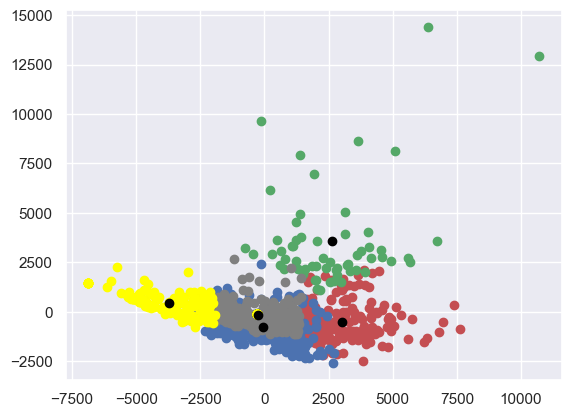

In [101]:
def reduce_dim_pca(components, X_train, X_test):
    """
    This method reduce the dimensionality of the Train and Test Matrix.
    """
    pca = PCA(n_components=components)
    X_r = pca.fit(X_train).transform(X_train)
    X_nr = pca.transform(X_test)
    text = 'Explained variation per principal component: {}'
    print(text.format(np.sum(pca.explained_variance_ratio_[:components])))
    return X_r, X_nr

X_r, X_nr = reduce_dim_pca(3,X,X)
k =5
print(X_r)
kmeans = Kmeans(k)
kmeans.train(X_r)
labels = kmeans.predict(X_r)



fig, ax = plt.subplots(1,1)
kmeans = Kmeans(5)
kmeans.train(X_r)
label = kmeans.predict(X_r)
 
ax.scatter(X_r[np.where(label==0),0],X_r[np.where(label==0),1],c='r')
ax.scatter(X_r[np.where(label==1),0],X_r[np.where(label==1),1],c='b')
ax.scatter(X_r[np.where(label==2),0],X_r[np.where(label==2),1],c='g')
ax.scatter(X_r[np.where(label==3),0],X_r[np.where(label==3),1],c='gray')
ax.scatter(X_r[np.where(label==4),0],X_r[np.where(label==4),1],c='yellow')
ax.scatter(X_r[np.where(label==5),0],X_r[np.where(label==5),1],c='brown')
ax.scatter(kmeans.mu[:,0],
           kmeans.mu[:,1], c='black')

## Crear 5 clusters. Seleccione las 3 caras más cercanas al centroide de cada cluster,
describa si son similares y porque estan cerca una de la otra.

In [102]:
lista = sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[0]))
lista

[(57, array([3144.76846579, -405.62406274, -619.48294952])),
 (11, array([2936.72969744, -685.32742227, -463.02407996])),
 (275, array([2681.18641382, -555.94063832, -455.38564787])),
 (226, array([2805.88755195,  -62.77232869, -516.09261762])),
 (460, array([ 3482.02050468,  -432.1894032 , -1170.74345931])),
 (214, array([2744.15114349, -498.63174601, -208.85602011])),
 (730, array([ 2668.24288185,  -869.80222132, -1123.57029158])),
 (457, array([ 3015.11096265, -1125.20144916,  -574.39370251])),
 (722, array([ 3.06035677e+03, -1.06596365e+00, -1.22809437e+03])),
 (802, array([3485.76646588,  -20.2109326 , -568.84545647])),
 (421, array([ 3539.20212598,  -224.33055589, -1202.14873325])),
 (374, array([2315.07893969, -752.20341981, -879.20564736])),
 (20, array([ 3033.867193  ,  -976.02776334, -1416.48431463])),
 (229, array([ 3157.73132737, -1171.87905067,  -253.67294687])),
 (422, array([ 2893.04505816, -1048.58200729,  -121.19283197])),
 (238, array([ 2704.28638227,  -621.81879485, 

### Estas tienen en comun el fondo negro, tambien la dos y la 3 son iguales, la uno tambien es muy simiar a las otras dos, su cabello, su nariz, su mirada y la parte del menton tambien spn muy similares entre las 3

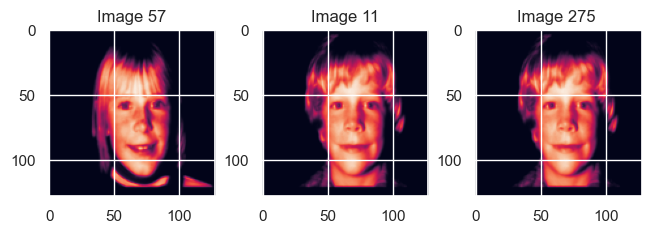

In [103]:
plot_x_images(X,lista[0][0], lista[1][0], lista[2][0])

In [104]:
lista = sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[1]))
lista

[(613, array([   4.74853083, -513.93090918, 1852.88249618])),
 (187, array([ 262.43227708, -926.76733777, 1854.80310955])),
 (29, array([-139.17044876, -972.70320132, 1202.34168365])),
 (169, array([-524.64579112, -737.55713954, 1603.54806159])),
 (442, array([-298.37124953, -410.29946719, 1455.99649519])),
 (161, array([ -349.73113197, -1193.09627272,  1614.50742973])),
 (239, array([ -375.66733357, -1257.16978596,  1493.9286239 ])),
 (338, array([ -408.80018688, -1250.11382973,  1660.60702414])),
 (589, array([ -95.44148779, -840.57890996, 2195.6380107 ])),
 (106, array([ -585.38063654, -1011.17147027,  1853.28745305])),
 (704, array([  407.95712427, -1079.65407394,  1876.4965783 ])),
 (14, array([  206.8214699 , -1014.42443273,  1063.88014469])),
 (207, array([ -641.13454936, -1097.10996058,  1567.39403082])),
 (735, array([-447.76336034, -389.19341782, 1237.43357272])),
 (244, array([ 568.49320919, -775.46129646, 1417.43897325])),
 (532, array([ -712.02605875, -1019.23805247,  1775

### Estas tienen en comun el fondo negro, tambien la dos y la 3 son iguales, estas no las veo muy similares con la foto numero 1, pero noto cierta similitud en su cabello, su nariz y la parte del menton

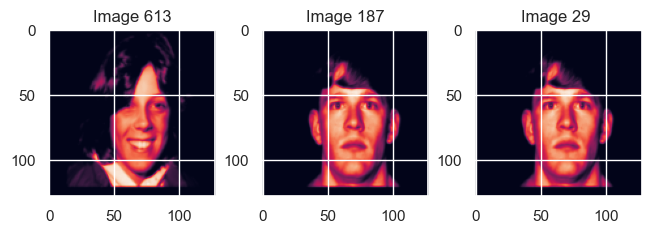

In [105]:
plot_x_images(X,lista[0][0], lista[1][0], lista[2][0])

In [106]:
lista = sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[2]))
lista

[(620, array([2065.47912026, 3592.74650759,  452.22080324])),
 (623, array([3153.74482389, 3934.7677414 ,  315.98016982])),
 (652, array([2565.13707726, 2519.38476862,  968.66669705])),
 (653, array([2831.22116948, 2193.66157008, 1042.4722553 ])),
 (686, array([1424.13772107, 3791.26498273,    9.07527344])),
 (643, array([3201.55524357, 2362.17015101,  137.9744012 ])),
 (622, array([3134.93628467, 5023.61371739,  564.03974412])),
 (655, array([2403.52948985, 2232.8493952 , -171.8216158 ])),
 (674, array([3335.11708423, 2063.97070133,  647.16265828])),
 (675, array([3558.41539189, 2136.23491505,  891.24764142])),
 (624, array([3271.56584456, 2419.71065983, -324.40899477])),
 (681, array([1094.18032228, 3325.80575719,  -24.6818797 ])),
 (662, array([2816.65250832, 1877.96134355,  359.9730945 ])),
 (429, array([2290.98731956, 2731.59821538, -806.68262782])),
 (611, array([1216.80301881, 2589.75662833, 1453.3289374 ])),
 (625, array([1372.13576912, 4920.01074557, 1133.55495956])),
 (271, a

### Estas tienen en comun el fondo como rojo , tambien la dos y la tres son iguales,, su cabello no es muy similar, pero sus labios y nariz son muy similares, tambien su oreja

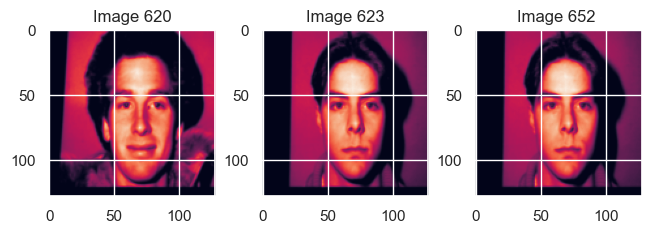

In [107]:
plot_x_images(X,lista[0][0], lista[1][0], lista[2][0])

In [110]:
lista = sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[3]))
lista

[(818, array([-123.60322522, -130.52989095, -842.90792633])),
 (0, array([ -274.29206207,   -89.05812694, -1059.76763224])),
 (17, array([ -23.25265963, -278.60887431, -971.38030361])),
 (831, array([ -39.76215394, -343.35418515, -827.91254295])),
 (232, array([  31.16165251, -166.93849078, -814.52700943])),
 (34, array([ -246.19297885,  -436.36399967, -1042.78343776])),
 (348, array([-199.57284459, -513.63388849, -834.26015102])),
 (494, array([ -584.7086908 ,  -259.39331289, -1031.62191911])),
 (33, array([  61.39905616,   49.05825703, -930.98314691])),
 (362, array([-354.47651339, -494.12009452, -670.86519234])),
 (38, array([ -72.59102324,  -14.56321924, -488.01901465])),
 (454, array([ -38.409803  , -564.64748945, -809.034369  ])),
 (120, array([ 179.46526672, -367.26917285, -862.0201834 ])),
 (336, array([-658.66912162, -353.49044131, -675.34533339])),
 (759, array([ -664.60547354,    30.97640226, -1088.12713633])),
 (46, array([ 203.43258208, -400.07200228, -944.98262484])),
 (3

### Estas tienen en comun el fondo negro, tambien la dos y la 3 son iguales, las facciones de su cara son similares, su cabello tambien es similar

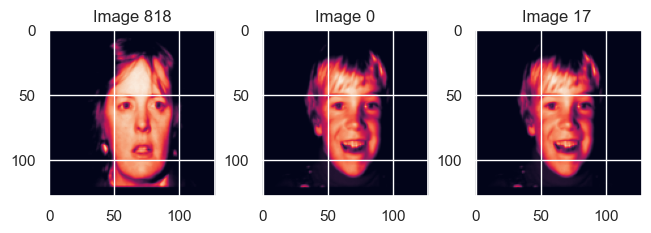

In [111]:
plot_x_images(X,lista[0][0], lista[1][0], lista[2][0])

In [112]:
lista = sorted(list(enumerate(X_r)), key= lambda x: np.linalg.norm(x[1]-kmeans.mu[4]))
lista

[(321, array([-3616.35033358,   451.42200021,  -276.83853621])),
 (66, array([-3709.17484915,   486.22012284,  -610.7185646 ])),
 (535, array([-3827.79850437,   217.06602769,  -470.93555936])),
 (534, array([-3949.79064668,   265.68858747,  -458.04229192])),
 (245, array([-3399.62979027,   337.90479385,  -335.69300697])),
 (533, array([-3805.70673307,   124.52993144,  -282.85677409])),
 (85, array([-3515.17543723,   146.62215541,  -174.62523297])),
 (461, array([-3450.73191886,   368.29446006,  -752.1254003 ])),
 (249, array([-3335.27667801,   482.22866383,  -779.18697097])),
 (196, array([-3660.06961802,    26.29951433,    -6.43992315])),
 (572, array([-4147.01561236,   628.75549922,    37.77764095])),
 (80, array([-3168.44035982,   443.98187485,  -648.02532576])),
 (466, array([-4125.97941887,   770.83061087,  -751.77173616])),
 (320, array([-3215.20035169,   -68.78979941,  -312.68747867])),
 (765, array([-3778.8313868 ,   111.00872803,   294.86165766])),
 (366, array([-3531.41081334

### Estatas tienen en comun que la 2  y la 3 son practicamente iguales, y la uno tiene en comun que son uscuras en la misma parte, la forma de la cara, la nariz y la boca

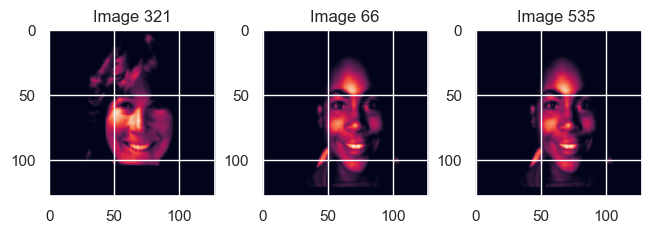

In [113]:
plot_x_images(X,lista[0][0], lista[1][0], lista[2][0])

### Descripcion: 
la primera mas cercana es mas diferente a las otras dos, pero tienen rasggos similares, como la parte oscura en las mismas partes de las fotos, las facciones de la sonrisa o la la nariz, esto se debe principalmente a que  estan mas cerca a los centroides, y los centroides son basicamente una media de cada grupo